***
In this notebook, we will actually run the SPHY model with the generated inputs in the previous notebooks.

We have completed preparing most of the SPHY model inputs. Currenlty, there are a few missing files related to glaciers and output options, which are provided in */trainings/202405-Bhutan/input/prep/*:
- GlacID_3_1000m.map: GLACIER ID. Nominal map with a unique ID for each glacier.
- GlacTable_bhutan_ex.csv: GLACIER CSV TABLE. Table with a unique cell id and is based on a uniqe combination of the model grid id and glacier id.
- ModelID_2.map: MODEL ID. Nominal map with a unique ID for each model grid cell.
- TLapse_bhutan_ex: TLAPSE. Table with lapse rates per month to lapse model grid cel temperature to glacier elevation temperature.
- reporting.csv: OUTPUT OPTIONS.
***

# 00. Before Running SPHY

The SPHY model contols the model input & output, module turn on/off, and parameter setting through the configuration file, which is provided in */trainings/202405-Bhutan/runs/initial/*.

You may want to refer to */trainings/202405-Bhutan/runs/SPHY-Configuration.xlsx* where the configuration options are organized by modules and indicated whether it could be essential, calibrated, or used for initialization.

In the configuration file, all the input and output paths are relative to the following **[DIRS]** configuration:<br>
**[DIRS]**<br>
inputdir 		= ../input/<br>
outputdir 		= ../runs/initial/<br>

Then, the **[DIRS]** configuration should be based on the current working directory. Let's first check it in a command line mode.

In [1]:
%%bash
pwd # current working directory
ls -l ../../../sphy.py # path for the SPHY model 
ls -l ../runs/initial/sphy_config_Bhutan.cfg # path for the configuration file

/Users/sony061/Library/CloudStorage/OneDrive-PNNL/Codes/SPHY/trainings/202405-Bhutan/scripts
-rwx------@ 1 sony061  staff  38387 Apr 26 14:47 ../../../sphy.py
-rwx------@ 1 sony061  staff  49346 Apr 26 23:19 ../runs/initial/sphy_config_Bhutan.cfg


# 01. Run SPHY

Now, we're going to run the SPHY model with python in a command line mode.

In [2]:
%%bash
python ../../../sphy.py ../runs/initial/sphy_config_Bhutan.cfg # run SPHY

The Spatial Processes in HYdrology (SPHY) model is
developed and owned by FutureWater, Wageningen, The Netherlands
Version 3.0, released June 2019
 
groundwater module imported
glacier module imported
snow module imported
routing module imported
Running SPHY for 1-1-2002 through 31-12-2004
with 1096 daily timesteps
wbal will be reported
TotStor will NOT be reported
RainStor will NOT be reported
SnowStor will NOT be reported
GlacStor will NOT be reported
BaseStor will NOT be reported
TotPrec will be reported
TotPrecF will NOT be reported
TotPrecEF will NOT be reported
LAI will NOT be reported
TotIntF will NOT be reported
TotRain will NOT be reported
TotRainF will NOT be reported
TotETref will NOT be reported
TotETrefF will NOT be reported
TotETpot will NOT be reported
TotETpotF will NOT be reported
TotETact will NOT be reported
TotETactF will NOT be reported
PlantStress will NOT be reported
TotSnow will be reported
TotSnowF will NOT be reported
TotSnowMelt will NOT be reported
TotSnowMe

# 02. After Running SPHY

After completing the first SPHY run **BEFORE Any Calibration**, we can find the SPHY output files in */trainings/202405-Bhutan/runs/initial/*.<br>
These outputs are generated during the SPHY run, based on the output options set in */trainings/202405-Bhutan/input/prep/reporting.csv*.

For the output files in the pcratser format, such as **.map* or **00.000* {digits represent a simulation day}, we can drag and drop them onto QGIS for quick visualizations or further GIS processings.

Or, we can also use a function, such as pcraster.aguila or one in *"pcr_tool.py"* to plot them on python.

In [3]:
### Load Packages
import os
import pcraster as pcr
import pcr_tool, output_tool

import cartopy

### Basic Setup for a Bhutan watersged (Punatsangchhu, Wangchhu, Amochhu, and Jaldakah)
epsg_model = 5266 # Bhutan National Grid: a transverse Mercator projection

path_data = os.path.join('..', 'data')
path_input = os.path.join('..', 'input')
path_run = os.path.join('..', 'runs', 'initial')

# Bhutan Administrative Boundaries (Level 1) to be added in a plot
path_shape = os.path.join(path_data, 'SHAPE', 'btn_admbnda_adm1_bnlc_20201026.shp')
shape_geometry = cartopy.io.shapereader.Reader(path_shape).geometries()
shape_feature = cartopy.feature.ShapelyFeature(shape_geometry, crs = cartopy.crs.PlateCarree(), facecolor = 'none', linewidth = 0.25)

### Load Clonemap and Points of Interest
map_clone = pcr_tool.clonemap(epsg = epsg_model)
path_clonemap = os.path.join(path_input, 'clone.map')
path_PoI = os.path.join(path_input, 'outlet.map')
map_clone.load_clonemap(path = path_clonemap)

print(f'- Input EPSG:\n{epsg_model}')
print(f'- Input PCRaster Path for Clonemap:\n{path_clonemap}')

- Input EPSG:
5266
- Input PCRaster Path for Clonemap:
../input/clone.map


- Path for Output Map:
../runs/initial/TotrY001.096


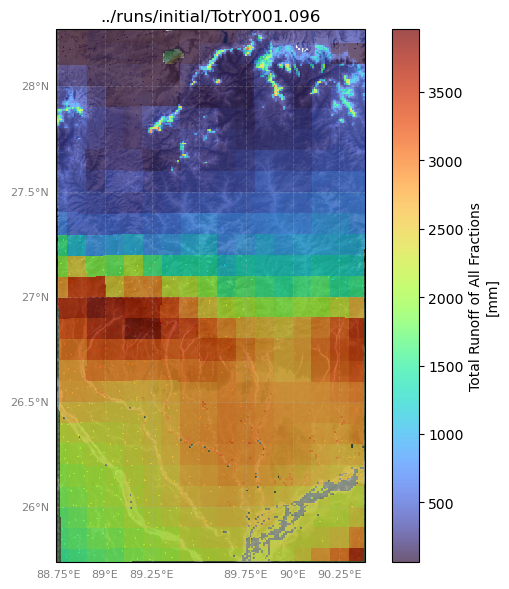

In [4]:
# Example 1: TOTAL RUNOFF OF ALL FRACTIONS - TotrY001.096 (Last Year in Simulation Period)
fn_map1 = 'TotrY001.096' # pcraster.Field to read
path_map1 = os.path.join(path_run, fn_map1)
print(f'- Path for Output Map:\n{path_map1}')

# plots
pcr.aguila(path_map1)
map_clone.plot_cartopy(
    field = path_map1, # pcraster.Field to plot
    shapes = [], # a list of cartopy.feature.ShapelyFeature to plot together
    figsize = (6, 6), # matplotlib figure size
    basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), # cartopy basemap (here, Google Satellite Images)
    basemap_level = 10, # cartopy basemap zoom level
    extent = None, # cartopy map extent
    vmin = None, # matplotlib contour min
    vmax = None, # matplotlib contour max
    cmap = 'turbo', # matplotlib contour colormap
    alpha = 0.7, # matplotlib contour transparency
    title = path_map1, # matplotlib figure title
    clabel = 'Total Runoff of All Fractions [mm]', # matplotlib contour label
    savefig = None, # path to save the figure
    )

- Path for Output Map:
../runs/initial/iceDepth_20041001.map


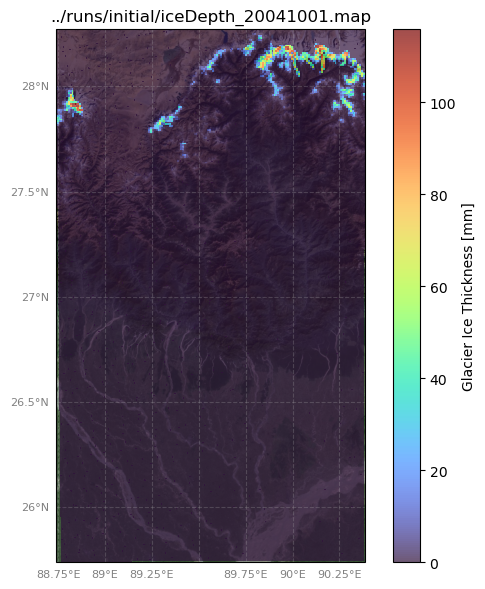

In [5]:
# Example 2: GLACIER ICE THICKNESS, iceDepth_20041001 (First Day of Last Water Year in Simulation Period)
fn_map2 = 'iceDepth_20041001.map' # pcraster.Field to read
path_map2 = os.path.join(path_run, fn_map2)
print(f'- Path for Output Map:\n{path_map2}')

# plots
pcr.aguila(path_map2)
map_clone.plot_cartopy(
    field = path_map2, # pcraster.Field to plot
    shapes = [], # a list of cartopy.feature.ShapelyFeature to plot together
    figsize = (6, 6), # matplotlib figure size
    basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), # cartopy basemap (here, Google Satellite Images)
    basemap_level = 10, # cartopy basemap zoom level
    extent = None, # cartopy map extent
    vmin = None, # matplotlib contour min
    vmax = None, # matplotlib contour max
    cmap = 'turbo', # matplotlib contour colormap
    alpha = 0.7, # matplotlib contour transparency
    title = path_map2, # matplotlib figure title
    clabel = 'Glacier Ice Thickness [mm]', # matplotlib contour label
    savefig = None, # path to save the figure
    )

There are also timeseries output files (**.tss*) for the points of interest that we assigned through *"outlet.map"*. To plot them on python, we can use a function in *"output_tool.py"*. In addition, if the observation timeseries is available, then it can be plotted together for comparision.

- Path for Output Timesereis:
../runs/initial/QAllDTS.tss
- Point ID in ../input/outlet.map:
15
- Path for Observaiton Timesereis :
../runs/HYDRO-ChimakotiDam-2002-2004-15.csv


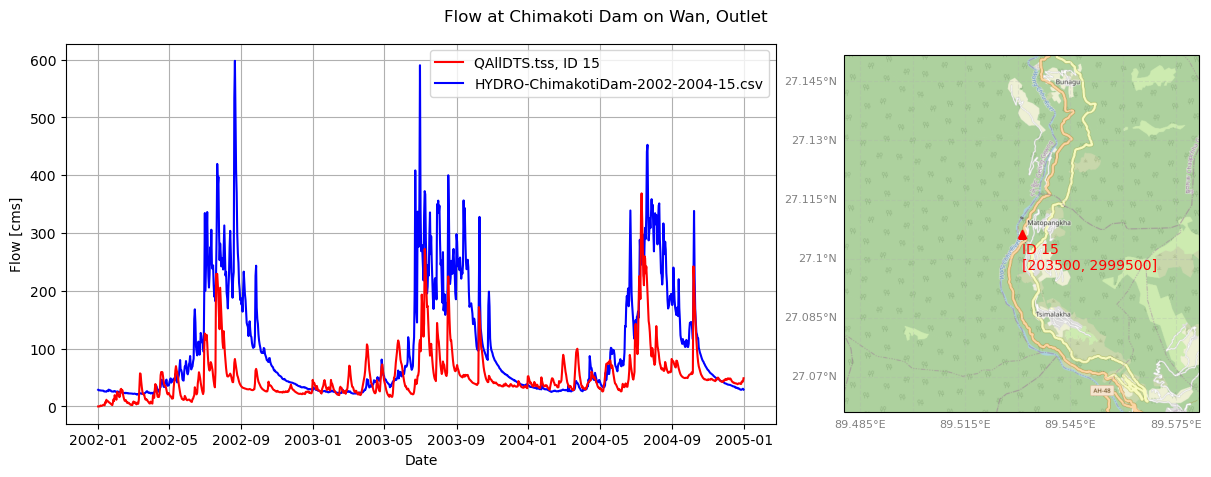

- Point ID in ../input/outlet.map:
23
- Path for Observaiton Timesereis :
../runs/HYDRO-Hacchu-2002-2004-23.csv


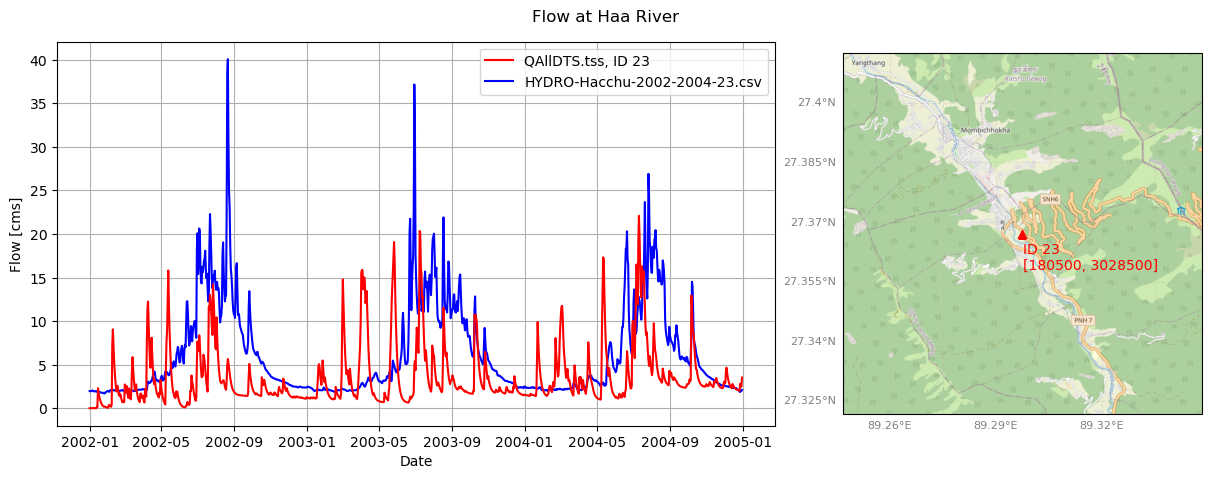

In [6]:
# Example 3: ROUTED TOTAL RUNOFF at Chimakoti Dam (15) and at Hacchu (23), QAllDTS.tss (Timeseries over Simulation Period)
startyear, startmonth, startday = 2002, 1, 1 # it needs a start date as the output files have only the number of days elapsed.
fn_tss = 'QAllDTS.tss' # SPHY timeseries to read
path_tss = os.path.join(path_run, fn_tss)
print(f'- Path for Output Timesereis:\n{path_tss}')

# at Chimakoti Dam
id_tss1 = 15 # Point ID
path_obs_tss1 = os.path.join('..', 'runs', 'HYDRO-ChimakotiDam-2002-2004-15.csv') # observation timeseries to read
print(f'- Point ID in {path_PoI}:\n{id_tss1}')
print(f'- Path for Observaiton Timesereis :\n{path_obs_tss1}')
output_tool.plot_tss(
    path_tss = path_tss, # SPHY timeseries to plot
    id_outlet = id_tss1, # Point ID to plot
    startyear = startyear, # SPHY simulation start year
    startmonth = startmonth, # SPHY simulation start month
    startday = startday, # SPHY simulation start day
    path_obscsv = path_obs_tss1, # observation timeseries to plot together
    plot_map = True, # add a panel to plot the Point location on the map
    path_outletmap = path_PoI, # outlet.map that contains location information
    outletmap_epsg = epsg_model, # outlet.map EPSG
    basemap = cartopy.io.img_tiles.OSM(), # cartopy basemap (here, OpenStreetMap)
    basemap_level = 13, # cartopy basemap zoom level
    extent = 5000, # cartopy map extent, e.g., 5 km from the Point location
    figsize = (12, 5), # matplotlib figure size
    suptitle = 'Flow at Chimakoti Dam on Wan, Outlet', # matplotlib figure title
    xlabel = 'Date', # matplotlib figure x-axis label
    ylabel = 'Flow [cms]', # matplotlib figure y-axis label
    savefig = None, # path to save the figure
    )

# at Hacchu
id_tss2 = 23 # Point ID
path_obs_tss2 = os.path.join('..', 'runs', 'HYDRO-Hacchu-2002-2004-23.csv') # observation timeseries to read
print(f'- Point ID in {path_PoI}:\n{id_tss2}')
print(f'- Path for Observaiton Timesereis :\n{path_obs_tss2}')
output_tool.plot_tss(
    path_tss = path_tss, # SPHY timeseries to plot
    id_outlet = id_tss2, # Point ID to plot
    startyear = startyear, # SPHY simulation start year
    startmonth = startmonth, # SPHY simulation start month
    startday = startday, # SPHY simulation start day
    path_obscsv = path_obs_tss2, # observation timeseries to plot together
    plot_map = True, # add a panel to plot the Point location on the map
    path_outletmap = path_PoI, # outlet.map that contains location information
    outletmap_epsg = epsg_model, # outlet.map EPSG
    basemap = cartopy.io.img_tiles.OSM(), # cartopy basemap (here, OpenStreetMap)
    basemap_level = 13, # cartopy basemap zoom level
    extent = 5000, # cartopy map extent, e.g., 5 km from the Point location
    figsize = (12, 5), # matplotlib figure size
    suptitle = 'Flow at Haa River', # matplotlib figure title
    xlabel = 'Date', # matplotlib figure x-axis label
    ylabel = 'Flow [cms]', # matplotlib figure y-axis label
    savefig = None, # path to save the figure
    )

**NOTE**: The first SPHY run was performed **WITHOUT Any Calibration** and shows inconsitency with the available observations. There are several ways to improve the SPHY model predictions:
1. Apply a bias correction on the meteorological forcing inputs, leveraging long-term climate observations at meteorological stations.
2. Update the SPHY model domain inputs with the latest, accurate sources of information, e.g., DEM, soil/land classifications, and glacier inventory.
3. Calibrate the SPHY model hydrologic properties based on available observations, e.g., streamflow gauge measurements and remote sensing datasets.